## Re-slicing

In [1]:
import sys
sys.path.clear
sys.path.append("/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice")

# Import necessary packages
from nilearn import plotting
import SUITPy.reslice as reslice


### Reslice image without mask
The reslice function takes at he mininum 2 input parameters: The list of source images (the images that you want to reslice) and the deformation map.

In [2]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii')

Since there is only one source image, we can directly use its index to get it. It allows multiple source images, and outputs can be accessed by using loop.

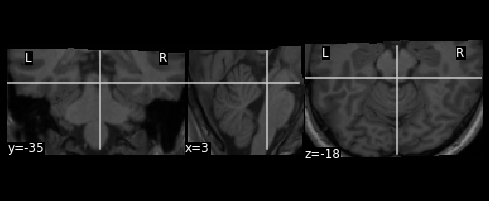

In [3]:
plotting.plot_anat(output_list)

### Reslice image with mask 
For cerebellar data analysis, it is good practice to mask the functional images to only retain the cerebellum before any smoothing occurrs. This prevents un-wanted spill-over of neocortical signal into the cerebellum. As a cerebellar mask you can use the mask produced in the [http://www.diedrichsenlab.org/imaging/suit_function.htm#suit_isolate_seg] of the matlab toolbox. 

In [4]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii', 
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii')

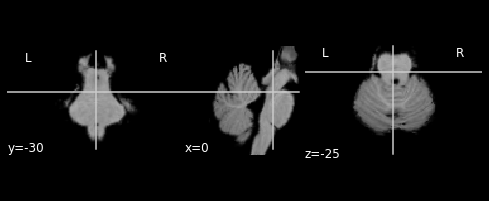

In [5]:
plotting.plot_anat(output_list)

### Specific voxel size
By default, the new image will be resliced into the same resolution and bouding box as the deformation map (y_xxx.nii). For functional data we often would like a different resolution. For this, you can simply specify the voxel size. 

In [6]:
output_list = reslice.reslice_image(source_image = 'anatomical_sess-01.nii',
                                    deformation = 'y_suitdef.nii',
                                    mask = 'c_anatomical_sess-01_pcereb.nii',
                                    voxelsize = (2,3,2))

/Users/jingyiwu/Desktop/SUITPy-Jingyi_Reslice/SUITPy/reslice.py:112: UserWarning: Both affine matrix and voxel size are specified!
  warnings.warn('Both affine matrix and voxel size are specified!')
/opt/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


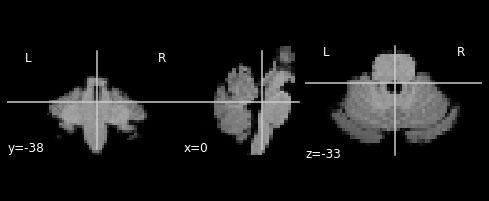

In [7]:
plotting.plot_anat(output_list)

In [8]:
# Voxel size has been changed.
output_list.affine

array([[  -2.,    0.,    0.,   70.],
       [   0.,    3.,    0., -100.],
       [   0.,    0.,    2.,  -75.],
       [   0.,    0.,    0.,    1.]])

### Specific image size

In [9]:
output_list = reslice.reslice_image(source_image = "anatomical_sess-01.nii",
                                    deformation = "y_suitdef.nii", 
                                    mask = "c_anatomical_sess-01_pcereb.nii", 
                                    imagesize=(150, 150, 150))

/opt/anaconda3/lib/python3.9/site-packages/nilearn/image/resampling.py:531: UserWarning: Casting data from int16 to float32
  warnings.warn("Casting data from %s to %s" % (data.dtype.name, aux))


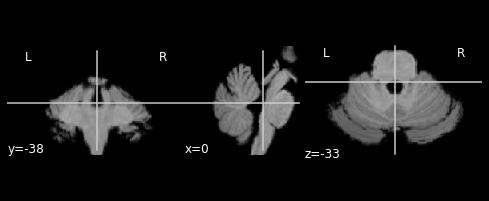

In [10]:
plotting.plot_anat(output_list)

In [11]:
# Image shape has been changed
output_list.shape

(150, 150, 150)